In [1]:
from virtuoso.dataset import ScorePerformDataset
from virtuoso.pyScoreParser import data_for_training as dft, data_class

import matplotlib.pyplot as plt
import numpy as np

In [11]:
dataset = data_class.YamahaDataset('/home/teo/userdata/datasets/chopin_cleaned/', save=False, features_only=True)
pair_set = dft.PairDataset(dataset)


100%|███████████████████████████████████████████████████████████████████████████████████████| 257/257 [06:38<00:00,  1.55s/it]


In [52]:
for piece in dataset.pieces:
  if np.min(piece.score_features['grace_order']) <-5:
    print(piece, np.min(piece.score_features['grace_order']))

Path name: /home/teo/userdata/datasets/chopin_cleaned/Chopin/Ballades/3/musicxml_cleaned.musicxml, Composer Name: Chopin, Number of Performances: 3 -7
Path name: /home/teo/userdata/datasets/chopin_cleaned/Haydn/Keyboard_Sonatas/39-2/musicxml_cleaned.musicxml, Composer Name: Haydn, Number of Performances: 1 -9
Path name: /home/teo/userdata/datasets/chopin_cleaned/Haydn/Keyboard_Sonatas/49-1/musicxml_cleaned.musicxml, Composer Name: Haydn, Number of Performances: 3 -47
Path name: /home/teo/userdata/datasets/chopin_cleaned/Haydn/Keyboard_Sonatas/6-1/musicxml_cleaned.musicxml, Composer Name: Haydn, Number of Performances: 1 -6
Path name: /home/teo/userdata/datasets/chopin_cleaned/Rachmaninoff/Preludes_op_32/5/musicxml_cleaned.musicxml, Composer Name: Rachmaninoff, Number of Performances: 2 -44
Path name: /home/teo/userdata/datasets/chopin_cleaned/Schubert/Piano_Sonatas/664-2/musicxml_cleaned.musicxml, Composer Name: Schubert, Number of Performances: 2 -6
Path name: /home/teo/userdata/datas

In [48]:
np.min(piece.score_features['grace_order'])

-7

In [12]:
squeezed_values = pair_set.get_squeezed_features(dft.VNET_INPUT_KEYS)

In [19]:
squeezed_output_values = pair_set.get_squeezed_features(dft.VNET_OUTPUT_KEYS)

In [14]:
np.asarray(squeezed_values['notation']).shape

(3151093, 9)

In [23]:
onset_dev_array = np.asarray(squeezed_output_values['onset_deviation'])

In [27]:
np.mean(onset_dev_array)

-0.003597605901363176

In [34]:
grace_order = np.asarray(squeezed_values['grace_order'])
grace_order = grace_order[grace_order!=0]

(array([   19.,    25.,    20.,    25.,    20.,    25.,    25.,    20.,
           63., 16902.]),
 array([-47. , -42.4, -37.8, -33.2, -28.6, -24. , -19.4, -14.8, -10.2,
         -5.6,  -1. ]),
 <BarContainer object of 10 artists>)

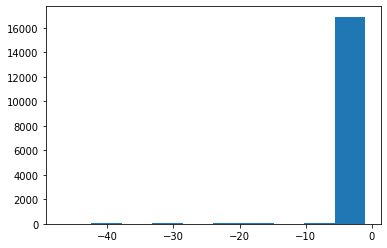

In [35]:
plt.hist(grace_order)

/tmp/ipykernel_2229765/385448432.py:2: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


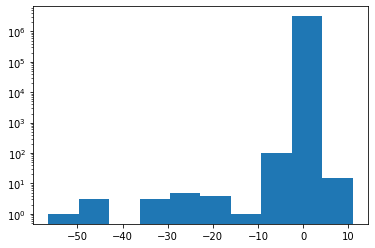

In [25]:
plt.hist(onset_dev_array)
plt.yscale('log', nonposy='clip')

In [17]:
squeezed_values['deviation'][0]

KeyError: 'deviation'

In [ ]:
plt.hist(np.asarray(squeezed_values['notation'])[:,0], 20)

In [2]:
dataset_path = 'dataset_beat/'
norm_dataset = ScorePerformDataset(dataset_path, 'entire', len_slice=1000, len_graph_slice=400, graph_keys=['forward', 'onset'])

In [4]:
input_features = np.concatenate([x['input_data'] for x in norm_dataset.data])
output_features = np.concatenate([x['output_data'] for x in norm_dataset.data])

In [ ]:
VNET_INPUT_KEYS = ('midi_pitch', 'duration', 'beat_importance', 'measure_length', 'qpm_primo',
                          'following_rest', 'distance_from_abs_dynamic', 'distance_from_recent_tempo',
                          'beat_position', 'xml_position', 'grace_order', 'preceded_by_grace_note',
                          'followed_by_fermata_rest', 'pitch', 'tempo', 'dynamic', 'time_sig_vec',
                          'slur_beam_vec',  'composer_vec', 'notation', 'tempo_primo')



(array([3.147504e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 3.117000e+03]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

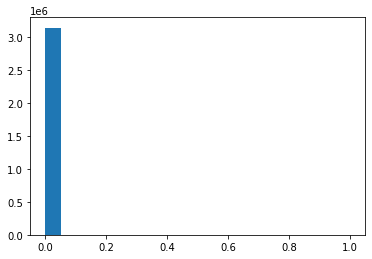

In [31]:
idx = -11
plt.hist(input_features[np.abs(input_features[:,idx])<5,idx], 20)